In [ ]:
%matplotlib inline
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from PIL import Image

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install -q keras

In [ ]:
train_dir = '/content/drive/My Drive/image classification/seg_train'
test_dir = '/content/drive/My Drive/image classification/seg_test'

In [ ]:
 augs = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

train_gen = augs.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size=8,
    class_mode = 'categorical'
)

test_gen = augs.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=8,
    class_mode='categorical'
)

Found 13244 images belonging to 6 classes.
Found 3009 images belonging to 6 classes.


# Model

In [ ]:
# MODEL

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('sigmoid'))
# COMPILE
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




# Augmentation

In [ ]:
batch_size = 20

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        train_dir,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 300x300
       # classes['buildings','forest','glacier','mountain','sea','street'],
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150,150),
        #classes['buildings','forest','glacier','mountain','sea','street'],
        batch_size=batch_size,
        class_mode='categorical')

Found 13244 images belonging to 6 classes.
Found 3009 images belonging to 6 classes.


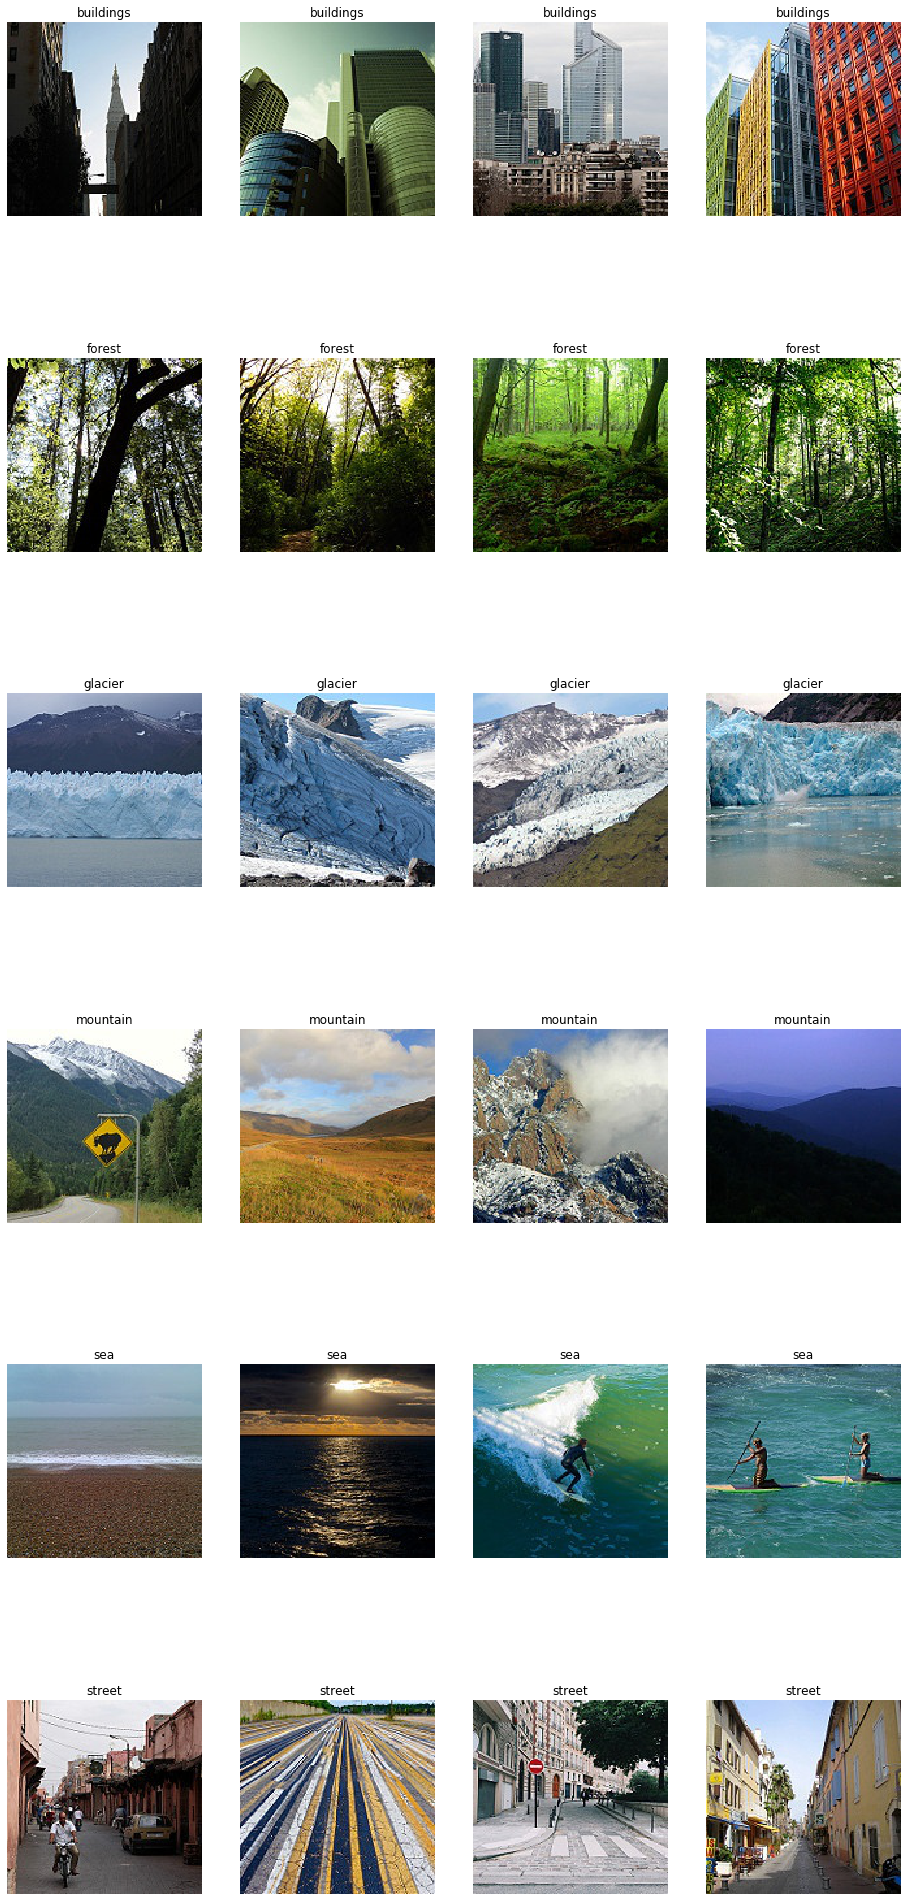

In [ ]:
classes=['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']
nrows=6
ncols=4

pic_index=0

fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*6)

pic_index+=4

next_a_pix = [os.path.join('/content/drive/My Drive/image classification/seg_train/'+classes[0]+'/' ,fname)
              for fname in os.listdir('/content/drive/My Drive/image classification/seg_train/'+classes[0]+'/')[pic_index-4:pic_index]]
next_b_pix = [os.path.join('/content/drive/My Drive/image classification/seg_train/'+classes[1]+'/' ,fname)
              for fname in os.listdir('/content/drive/My Drive/image classification/seg_train/'+classes[1]+'/')[pic_index-4:pic_index]]
next_c_pix = [os.path.join('/content/drive/My Drive/image classification/seg_train/'+classes[2]+'/' ,fname)
              for fname in os.listdir('/content/drive/My Drive/image classification/seg_train/'+classes[2]+'/')[pic_index-4:pic_index]]
next_d_pix = [os.path.join('/content/drive/My Drive/image classification/seg_train/'+classes[3]+'/' ,fname)
              for fname in os.listdir('/content/drive/My Drive/image classification/seg_train/'+classes[3]+'/')[pic_index-4:pic_index]]
next_e_pix = [os.path.join('/content/drive/My Drive/image classification/seg_train/'+classes[4]+'/' ,fname)
              for fname in os.listdir('/content/drive/My Drive/image classification/seg_train/'+classes[4]+'/')[pic_index-4:pic_index]]
next_f_pix = [os.path.join('/content/drive/My Drive/image classification/seg_train/'+classes[5]+'/' ,fname)
              for fname in os.listdir('/content/drive/My Drive/image classification/seg_train/'+classes[5]+'/')[pic_index-4:pic_index]]

j=0
for i, img_path in enumerate(next_a_pix+next_b_pix+next_c_pix+next_d_pix+next_e_pix+next_f_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)

  if i%4==0 and i>=4:
    j=j+1
  sp.title.set_text(classes[j])


plt.show()

# Training

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=13246 // batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=3009 // batch_size)

model.save_weights('50_epochs.h5')  # always save your weights after training or during training


Epoch 1/20


FileNotFoundError: ignored

In [ ]:
SEED = 2209
import os
import random as rn
import numpy as np
from tensorflow import set_random_seed

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
set_random_seed(SEED)
rn.seed(SEED)

cnn


In [ ]:
import tensorflow as tf
from keras import regularizers

model1=tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(3,3),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(6,activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model1.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=model1.fit_generator(
  train_generator,
  steps_per_epoch=int(12632/64),
  epochs=50,
  validation_data=validation_generator,
  validation_steps=int(1402/64)

)

Epoch 1/50


InvalidArgumentError: ignored

In [ ]:
accuracy=model1.evaluate_generator(test_generator, steps=len(test_generator)//32, callbacks=[reduce],verbose=2)
print('Accuracy of the model on the test set: ',accuracy[1])

dense net

In [ ]:
from keras.layers import *
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np
from keras.applications.densenet import DenseNet121
import keras


base_model1=DenseNet121(include_top=False, weights= 'imagenet',  input_shape=(150,150,3), pooling='avg')
base_model1.trainable = False

x = Dense(256, activation='relu')(base_model1.output)
x = Dropout(0.5)(x)
x = Dense(1, activation='softmax')(x)

transfer_model1 = Model(base_model1.input, x)
transfer_model1.compile(optimizer =keras.optimizers.SGD(lr=0.0001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
import tensorflow as tf
reduce = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
history2 = transfer_model1.fit_generator(
            train_generator,
            steps_per_epoch=int(12632/64),
            epochs=50,
            validation_data=validation_generator,
            validation_steps=int(1402/64),
            callbacks=[reduce],
            verbose=1)

Epoch 1/50


ValueError: ignored